### Linear Regression

In [1]:
%matplotlib inline
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = datasets.load_iris()
# Iris dataset to pandas df
irisDF = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])
# columnames
columnNames =  irisDF.columns.tolist()

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


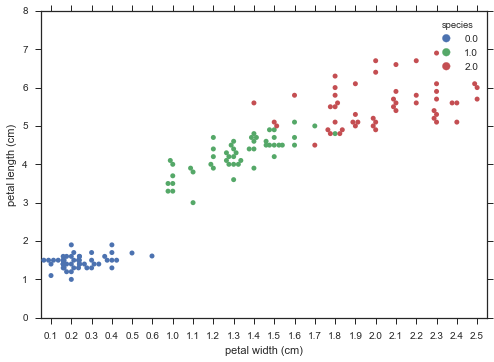

In [2]:
# Iris: petal width (cm) X petal length (cm) to regression
sns.swarmplot( data=irisDF , x='petal width (cm)', y='petal length (cm)', hue="species")

In [3]:
# Split dataset into training and test subsets
msk = np.random.rand(len(irisDF)) < 0.8
trainIris = irisDF[msk]
testIris = irisDF[~msk]

In [4]:
# Apply linear regresion model
from sklearn import linear_model
linearReg = linear_model.LinearRegression()
lrModel = linearReg.fit(trainIris['petal width (cm)'].reshape(-1, 1) , trainIris['petal length (cm)'])
# Coefficient
print lrModel.coef_

[ 2.21117326]


/Library/Python/2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [13]:
# Get predictions
predictions = lrModel.predict(testIris['petal width (cm)'].reshape(-1, 1))
# Mean squared error
mse = np.mean((predictions - testIris['petal length (cm)']) ** 2)
print "MSE: ", mse
# Variance score: 1 is perfect prediction
score = lrModel.score(testIris['petal width (cm)'].reshape(-1, 1), testIris['petal length (cm)'])
print "Variance score: ", score

MSE:  0.133519434811
Variance score:  0.95559622434


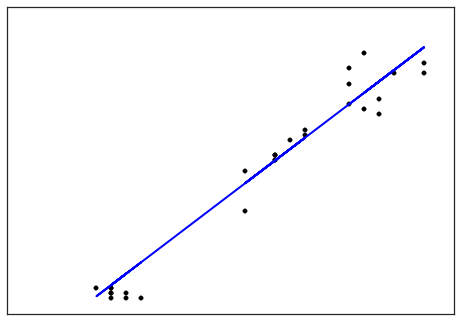

In [6]:
# Plot scatter + predictions
plt.pyplot.scatter(testIris['petal width (cm)'], testIris['petal length (cm)'], color ='black')
plt.pyplot.plot(testIris['petal width (cm)'], predictions, color ='blue', linewidth=2)

plt.pyplot.xticks(())
plt.pyplot.yticks(())

plt.pyplot.show()

### Regression metrics

In [11]:
# Variance score (close to 1 the best)
from sklearn.metrics import explained_variance_score
print explained_variance_score(testIris['petal length (cm)'], predictions)

0.957599392275


In [10]:
# MSE
from sklearn.metrics import mean_squared_error
print mean_squared_error(testIris['petal length (cm)'], predictions) 

0.133519434811


### Seaborn visualization + regression plots

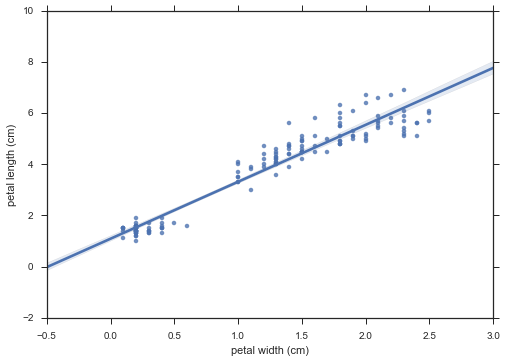

In [7]:
# Seaborn regression plot
sns.regplot(data=irisDF, x='petal width (cm)', y='petal length (cm)')

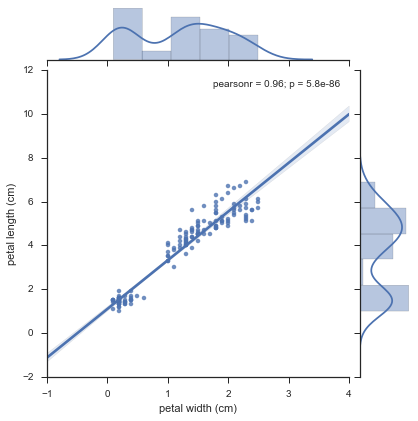

In [8]:
# Seaborn joint plot - regression
sns.jointplot(data=irisDF, x='petal width (cm)', y='petal length (cm)', kind="reg")